AttributeError: AnnotationBbox.set() got an unexpected keyword argument 'xytext'

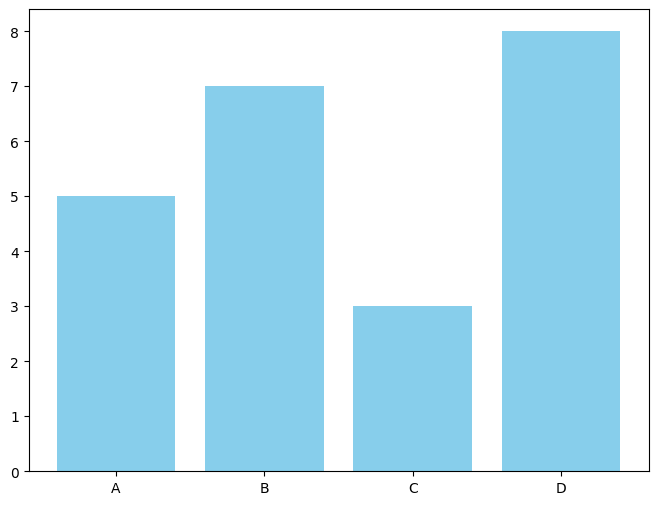

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Example data
categories = ['A', 'B', 'C', 'D']
values = [5, 7, 3, 8]

# Load example images (replace with actual file paths or URLs)
image_paths = ["United_States.png", "Nigeria.png", "Germany.png", "Brazil.png"]

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(categories, values, color='skyblue')

# Function to load and place images
def add_images_to_bars(ax, bars, image_paths):
    for bar, img_path in zip(bars, image_paths):
        # Load image
        img = plt.imread(img_path)
        imagebox = OffsetImage(img, zoom=0.2)  # Adjust zoom as needed
        ab = AnnotationBbox(imagebox, (bar.get_x() + bar.get_width()/2, bar.get_height()),
                            xycoords='data', boxcoords="offset points", frameon=False, pad=0, xytext=(0, 10))
        ax.add_artist(ab)

# Add images
add_images_to_bars(ax, bars, image_paths)

# Customize chart
ax.set_ylim(0, max(values) + 3)
ax.set_ylabel("Values")
ax.set_title("Bar Chart with Images on Top")

plt.show()

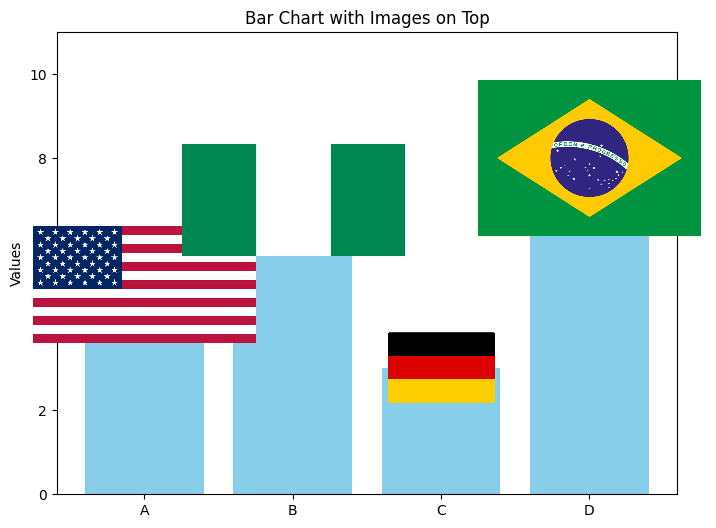

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Example data
categories = ['A', 'B', 'C', 'D']
values = [5, 7, 3, 8]

# Load example images (replace with actual file paths)
image_paths = ["United_States.png", "Nigeria.png", "Germany.png", "Brazil.png"]

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(categories, values, color='skyblue')

# Function to load and place images
def add_images_to_bars(ax, bars, image_paths):
    for bar, img_path in zip(bars, image_paths):
        # Load image
        img = plt.imread(img_path)
        imagebox = OffsetImage(img, zoom=0.2)  # Adjust zoom as needed
        ab = AnnotationBbox(imagebox, (bar.get_x() + bar.get_width()/2, bar.get_height()),
                            xycoords='data', boxcoords="data", frameon=False)
        ax.add_artist(ab)

# Add images
add_images_to_bars(ax, bars, image_paths)

# Customize chart
ax.set_ylim(0, max(values) + 3)
ax.set_ylabel("Values")
ax.set_title("Bar Chart with Images on Top")

plt.show()

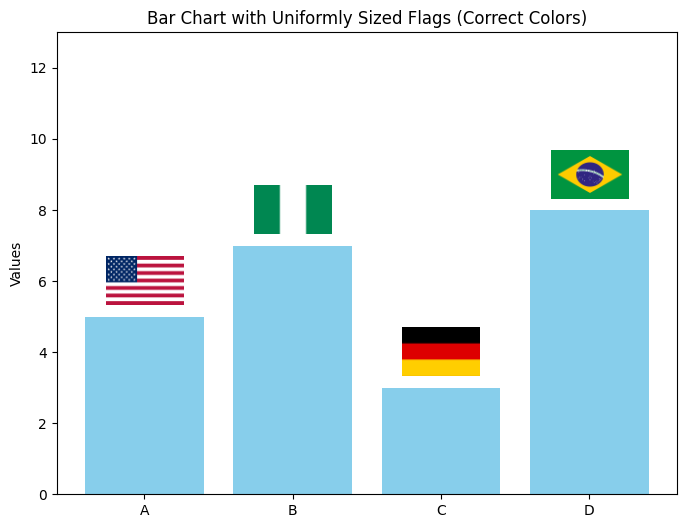

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2

# Example data
categories = ['A', 'B', 'C', 'D']
values = [5, 7, 3, 8]

# Load example images (replace with actual file paths)
image_paths = ["United_States.png", "Nigeria.png", "Germany.png", "Brazil.png"]



# Set fixed image size (pixels)
fixed_width = 80  # Adjust size for visibility
fixed_height = 50

# Function to resize images using OpenCV (preserves colors)
def resize_image(image_path, fixed_width, fixed_height):
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # Read with original colors
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
    img = cv2.resize(img, (fixed_width, fixed_height), interpolation=cv2.INTER_AREA)  # Resize image
    return img

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(categories, values, color='skyblue')

# Function to add uniform-sized images on bars
def add_images_to_bars(ax, bars, image_paths, fixed_width, fixed_height):
    for bar, img_path in zip(bars, image_paths):
        img = resize_image(img_path, fixed_width, fixed_height)  # Resize flag while keeping colors

        # Convert image to Matplotlib format
        imagebox = OffsetImage(img, zoom=0.7)  # Adjust zoom for visibility
        ab = AnnotationBbox(imagebox, 
                            (bar.get_x() + bar.get_width() / 2, bar.get_height() + 1),  # Adjust height
                            xycoords='data', boxcoords="data", frameon=False)
        ax.add_artist(ab)

# Add images with uniform size and correct colors
add_images_to_bars(ax, bars, image_paths, fixed_width, fixed_height)

# Customize chart
ax.set_ylim(0, max(values) + 5)  # Increase y-limit for images
ax.set_ylabel("Values")
ax.set_title("Bar Chart with Uniformly Sized Flags (Correct Colors)")

plt.show()

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2

In [38]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import wbdata
import requests
import pandas as pd
from datetime import datetime
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [37]:
# This will give you a variable that refers to the  indicator of total population of each country, 
# it is a wbdata.client.SearchResult, with this we can 
indicator = wbdata.get_indicators('SP.POP.TOTL')

# Fetch data from the World Bank API
df = wbdata.get_dataframe({"SP.POP.TOTL" : "Population, total"}, country=["NGA","USA","DEU", "BRA" ], date = ( "1960", "2025") )

# This is cleaning the data so it is ready to be used 

df = df.reset_index()
df = df.rename(columns={"date": "Years", "country": "Country", "Population, total": "Population"})
df["Years"] = df["Years"].astype(int)
df["Population"] = pd.to_numeric(df["Population"], errors="coerce")
df["Population"] = df["Population"].astype(int)
df = df.dropna()
df = df.sort_values(by=["Country", "Years"])

In [39]:
# Load example images (replace with actual file paths)
image_paths = ["United_States.png", "Nigeria.png", "Germany.png", "Brazil.png"]



# Set fixed image size (pixels)
fixed_width = 80  # Adjust size for visibility
fixed_height = 50

# Function to resize images using OpenCV (preserves colors)
def resize_image(image_path, fixed_width, fixed_height):
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # Read with original colors
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
    img = cv2.resize(img, (fixed_width, fixed_height), interpolation=cv2.INTER_AREA)  # Resize image
    return img

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(df["Country"], df["Population"], color='skyblue')

# Function to add uniform-sized images on bars
def add_images_to_bars(ax, bars, image_paths, fixed_width, fixed_height):
    for bar, img_path in zip(bars, image_paths):
        img = resize_image(img_path, fixed_width, fixed_height)  # Resize flag while keeping colors

        # Convert image to Matplotlib format
        imagebox = OffsetImage(img, zoom=0.7)  # Adjust zoom for visibility
        ab = AnnotationBbox(imagebox, 
                            (bar.get_x() + bar.get_width() / 2, bar.get_height() + 1),  # Adjust height
                            xycoords='data', boxcoords="data", frameon=False)
        ax.add_artist(ab)

# Add images with uniform size and correct colors
add_images_to_bars(ax, bars, image_paths, fixed_width, fixed_height)

# Customize chart
ax.set_ylim(0, max(values) + 5)  # Increase y-limit for images
ax.set_ylabel("Values")
ax.set_title("Bar Chart with Uniformly Sized Flags (Correct Colors)")

plt.show()

ValueError: Image size of 686x-1481592067 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x600 with 1 Axes>